# Аналiз даних за обраним типом повiдомленням

In [1]:
import glob
import os
import pandas as pd
import numpy as np

from datetime import datetime, tzinfo
import pytz

In [2]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.dates import DateFormatter, MinuteLocator, SecondLocator

%matplotlib inline

## Всnановлення шляхiв до папки та назва файла, куди збережено частину .tlog

In [3]:
DIR_DATA = '/home/fel/Документы/tmp/'
local_file_name = 'battery.csv'

## Прочитати csv-файл за допомогою pandas 

In [4]:
full_path_to_file = os.path.join(DIR_DATA, local_file_name)

In [5]:
df = pd.read_csv(full_path_to_file)

## Характеристика даних

In [6]:
# iнформацiя про поля (кiлькiсть, назви колонок) та кiлькiсть записiв (рядкiв)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
2018-07-31 16:03:26.55: SYS_STATUS {onboard_control_sensors_present : 2161691    2919 non-null object
 onboard_control_sensors_enabled : 2129944                                       2919 non-null object
 onboard_control_sensors_health : 3210240                                        2919 non-null object
 load : 0                                                                        2919 non-null object
 voltage_battery : 0                                                             2919 non-null object
 current_battery : 0                                                             2919 non-null object
 battery_remaining : 100                                                         2919 non-null object
 drop_rate_comm : 0                                                              2919 non-null object
 errors_comm : 0                                                             

In [7]:
# приклад перших 5-ти рядкiв
df[' battery_remaining : 100'][:5]

0     battery_remaining : 100
1     battery_remaining : 100
2     battery_remaining : 100
3     battery_remaining : 100
4     battery_remaining : 100
Name:  battery_remaining : 100, dtype: object

In [8]:
# назви полiв
df.columns

Index(['2018-07-31 16:03:26.55: SYS_STATUS {onboard_control_sensors_present : 2161691',
       ' onboard_control_sensors_enabled : 2129944',
       ' onboard_control_sensors_health : 3210240', ' load : 0',
       ' voltage_battery : 0', ' current_battery : 0',
       ' battery_remaining : 100', ' drop_rate_comm : 0', ' errors_comm : 0',
       ' errors_count1 : 0', ' errors_count2 : 0', ' errors_count3 : 0',
       ' errors_count4 : 0}'],
      dtype='object')

In [9]:
# приклад, як змiнити назви полiв
df.columns = ['date_status', 'sensors_enabled', 'sensors_health', 'load',
              'voltage_battery', 'current_battery', 'battery_remaining',
              'drop_rate_comm', 
              'errors_comm', 'errors_count1', 'errors_count2', 'errors_count3', 'errors_count4']
df.head(10)

,date_status,sensors_enabled,sensors_health,load,voltage_battery,current_battery,battery_remaining,drop_rate_comm,errors_comm,errors_count1,errors_count2,errors_count3,errors_count4
0,2018-07-31 16:03:27.18: SYS_STATUS {onboard_co...,onboard_control_sensors_enabled : 2129944,onboard_control_sensors_health : 3210240,load : 0,voltage_battery : 0,current_battery : 0,battery_remaining : 100,drop_rate_comm : 0,errors_comm : 0,errors_count1 : 0,errors_count2 : 0,errors_count3 : 0,errors_count4 : 0}
1,2018-07-31 16:03:28.22: SYS_STATUS {onboard_co...,onboard_control_sensors_enabled : 2129944,onboard_control_sensors_health : 3210240,load : 0,voltage_battery : 0,current_battery : 0,battery_remaining : 100,drop_rate_comm : 0,errors_comm : 0,errors_count1 : 0,errors_count2 : 0,errors_count3 : 0,errors_count4 : 0}
2,2018-07-31 16:03:29.19: SYS_STATUS {onboard_co...,onboard_control_sensors_enabled : 2129947,onboard_control_sensors_health : 3210251,load : 0,voltage_battery : 0,current_battery : 0,battery_remaining : 100,drop_rate_comm : 0,errors_comm : 0,errors_count1 : 0,errors_count2 : 0,errors_count3 : 0,errors_count4 : 0}
3,2018-07-31 16:03:30.19: SYS_STATUS {onboard_co...,onboard_control_sensors_enabled : 2129947,onboard_control_sensors_health : 3210251,load : 0,voltage_battery : 0,current_battery : 0,battery_remaining : 100,drop_rate_comm : 0,errors_comm : 0,errors_count1 : 0,errors_count2 : 0,errors_count3 : 0,errors_count4 : 0}
4,2018-07-31 16:03:31.23: SYS_STATUS {onboard_co...,onboard_control_sensors_enabled : 2129947,onboard_control_sensors_health : 3210267,load : 0,voltage_battery : 0,current_battery : 0,battery_remaining : 100,drop_rate_comm : 0,errors_comm : 0,errors_count1 : 0,errors_count2 : 0,errors_count3 : 0,errors_count4 : 0}
5,2018-07-31 16:03:32.20: SYS_STATUS {onboard_co...,onboard_control_sensors_enabled : 2129947,onboard_control_sensors_health : 3210267,load : 0,voltage_battery : 0,current_battery : 0,battery_remaining : 100,drop_rate_comm : 0,errors_comm : 0,errors_count1 : 0,errors_count2 : 0,errors_count3 : 0,errors_count4 : 0}
6,2018-07-31 16:03:33.23: SYS_STATUS {onboard_co...,onboard_control_sensors_enabled : 2129947,onboard_control_sensors_health : 3210267,load : 0,voltage_battery : 0,current_battery : 0,battery_remaining : 100,drop_rate_comm : 0,errors_comm : 0,errors_count1 : 0,errors_count2 : 0,errors_count3 : 0,errors_count4 : 0}
7,2018-07-31 16:03:34.24: SYS_STATUS {onboard_co...,onboard_control_sensors_enabled : 2129947,onboard_control_sensors_health : 3210267,load : 0,voltage_battery : 0,current_battery : 0,battery_remaining : 100,drop_rate_comm : 0,errors_comm : 0,errors_count1 : 0,errors_count2 : 0,errors_count3 : 0,errors_count4 : 0}
8,2018-07-31 16:03:34.41: SYS_STATUS {onboard_co...,onboard_control_sensors_enabled : 2129947,onboard_control_sensors_health : 3210267,load : 0,voltage_battery : 0,current_battery : 0,battery_remaining : 100,drop_rate_comm : 0,errors_comm : 0,errors_count1 : 0,errors_count2 : 0,errors_count3 : 0,errors_count4 : 0}
9,2018-07-31 16:03:36.41: SYS_STATUS {onboard_co...,onboard_control_sensors_enabled : 2133019,onboard_control_sensors_health : 3210267,load : 613,voltage_battery : 16565,current_battery : 11,battery_remaining : 99,drop_rate_comm : 0,errors_comm : 0,errors_count1 : 0,errors_count2 : 0,errors_count3 : 0,errors_count4 : 0}


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
date_status          2919 non-null object
sensors_enabled      2919 non-null object
sensors_health       2919 non-null object
load                 2919 non-null object
voltage_battery      2919 non-null object
current_battery      2919 non-null object
battery_remaining    2919 non-null object
drop_rate_comm       2919 non-null object
errors_comm          2919 non-null object
errors_count1        2919 non-null object
errors_count2        2919 non-null object
errors_count3        2919 non-null object
errors_count4        2919 non-null object
dtypes: object(13)
memory usage: 296.5+ KB


## Фiльтрацiя даних: вибiр рядкiв по датi та рiвню заряда батареi

In [12]:
# виокремлення з текстовoго рядка дати (форма команди залежить вiд запису в текстовому рядку)
sd = df['date_status'][0].split(': S')[0][:-3]
print(df['date_status'][0])
sd

2018-07-31 16:03:27.18: SYS_STATUS {onboard_control_sensors_present : 2161691


'2018-07-31 16:03:27'

In [14]:
# timestamps - список всiх дат
timestamps = []
for i, row in df.iterrows():
    try:
        str_date = row['date_status'].split(': S')[0][:-3]
        #t = datetime.strptime(str_date, '%Y-%m-%d %H:%M:%S')
        t = pd.Timestamp(str_date, tz=pytz.timezone('UTC')).to_pydatetime()
    except:
        print(str_date)
    timestamps.append(t)

len(timestamps), timestamps[:5]

(2919,
 [datetime.datetime(2018, 7, 31, 16, 3, 27, tzinfo=<UTC>),
  datetime.datetime(2018, 7, 31, 16, 3, 28, tzinfo=<UTC>),
  datetime.datetime(2018, 7, 31, 16, 3, 29, tzinfo=<UTC>),
  datetime.datetime(2018, 7, 31, 16, 3, 30, tzinfo=<UTC>),
  datetime.datetime(2018, 7, 31, 16, 3, 31, tzinfo=<UTC>)])

In [15]:
# виокремлення з текстовoго рядка заряду батареi та конвертацiя в int
x = df['battery_remaining'][0].split(':')[1]
print(df['battery_remaining'][0])
x, int(x)

 battery_remaining : 100


(' 100', 100)

In [16]:
# battery - список зараду батареi для кожноi дати
battery = []
for i, row in df.iterrows():
    try:
        str_b = row['battery_remaining'].split(':')[1]
        b = int(str_b)
    except:
        print(str_b)
    battery.append(b)

len(battery), battery[:3]

(2919, [100, 100, 100])

## Вiзуалiзацiя витрат енергii протягом роботи дрону

In [23]:
# построение диаграммы с помощью scatter
def show_distribution_scatter(row, col, pos, values, frequences):
    x, y = values, frequences
  
    ax = plt.subplot(row, col, pos)
    
    plt.scatter(x, y)
    
    title="Розподiл зараду батареi по датам вiд {} до {}".format(
                    timestamps[0].strftime('%Y-%m-%d %H:%M:%S'),
                    timestamps[-1].strftime('%Y-%m-%d %H:%M:%S')
                )
    plt.title(title, fontdict={'size':14})
    plt.xlabel('times', fontdict={'size':12})    
    plt.ylabel('battery remaining', fontdict={'size':12})
    
    locator = SecondLocator(bysecond=[0, 20, 40])
    #seclocator.MAXTICKS  = 40000
    fmt = DateFormatter('%Y-%m-%d %H:%M:%S') 
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(fmt)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

    ax.set_yticks(np.arange(70, 101, step=1))

    plt.grid()

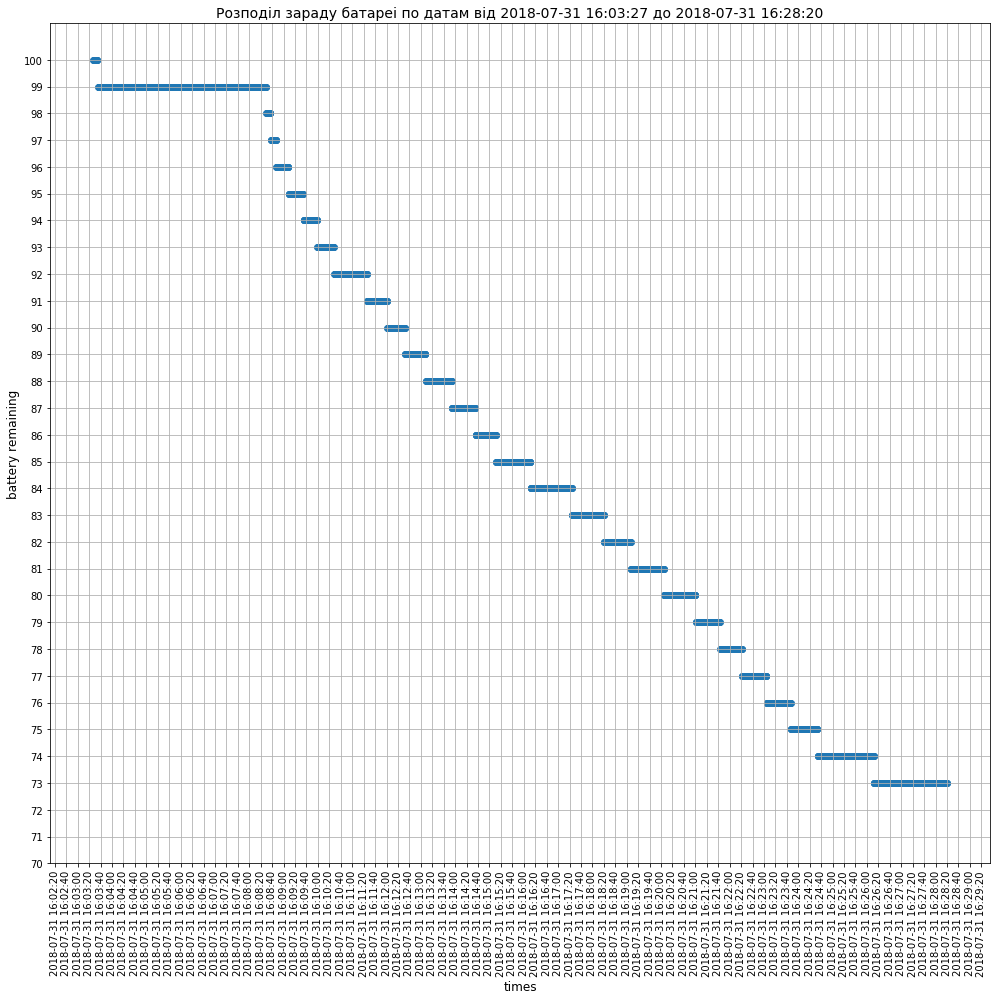

In [24]:
plt.figure(figsize=(14, 14))

show_distribution_scatter(1, 1, 1, timestamps, battery)

plt.tight_layout()
plt.show()

## Висновки
 1. Час спостережень в файлi .tlog вiд 2018-07-31 16:03:27 до 2018-07-31 16:28:20, тобто тривалiсть спостережень 25 хвилин.
 2. За 25 хв роботи дрон витратив 25% своеi енергii. 
 3. З дiаграми видно, що витрати були нерiвномiрнi по часу.
 4. На витрати вплинули режими використання дрону: розгон та гальмування пiд час пiдйому та поворотiв, знесення вiтром.
 
 **Отже, пiд час створення моделi руху дрону потрiбно врахувати цi зовнiшнi чинники.**